<a href="https://colab.research.google.com/github/szh141/Examples/blob/main/Python%20tricks/random_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

generator is different than np.random.randint

generator yield random number as it goes, doesn't require a list

In [1]:
import numpy as np
rng = np.random.default_rng()

In [2]:
for i in range(10):
  print(rng.integers(50,256))

75
89
54
218
61
177
238
234
131
246


In [3]:
random_array = np.random.randint(50,256,10)
random_array

array([ 90, 118, 108, 128, 208, 208, 113, 215,  79, 172])

# example of random intensity of the blob

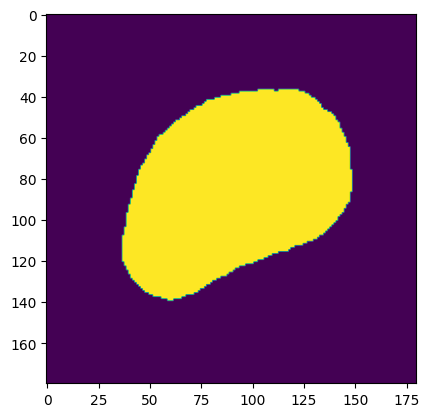

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from scipy import ndimage as ndi
from skimage import data, filters, measure, segmentation

# segment nucleus
nucleus = data.protein_transport()[0, 0, :, :180]
smooth = filters.gaussian(nucleus, sigma=1.5)
thresh = smooth > filters.threshold_otsu(smooth)
fill = ndi.binary_fill_holes(thresh)
nucleus_seg = segmentation.clear_border(fill)
plt.imshow(nucleus_seg)

# protein blobs of varying intensity
proteinA = np.zeros_like(nucleus, dtype="float64")
proteinA_seg = np.zeros_like(nucleus, dtype="float64")

rng = np.random.default_rng()

for i in range(10):
  blobs = data.binary_blobs(180,
                            blob_size_fraction=0.5,
                            volume_fraction=(50/(180**2)),
                            )
  blobs_image = filters.gaussian(blobs, sigma=1.5) * rng.integers(50, 256)
  proteinA += blobs_image
  proteinA_seg += blobs